## Imports

In [13]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load data into a dataframe

In [14]:
os.chdir('C:\Apurva\Conservation Games\Games meta-analysis\Datasets\Data Gabon, Orkney, Madagascar and Kenya')
print(os.getcwd())

C:\Apurva\Conservation Games\Games meta-analysis\Datasets\Data Gabon, Orkney, Madagascar and Kenya


In [15]:
# read into dataframe
data = pd.read_csv('combined7.csv', index_col=0)

## Compute normalized score for environmental production outcome

In [16]:
data['z_envProduction'] = data.groupby('country')['envProduction'].transform(lambda x: scale(x.astype(float)))

## Country-wise statistics for the environmental production outcome

In [17]:
data[['envProduction', 'country']].groupby('country').describe()

envProduction                                                   \
                   count         mean          std   min      25%     50%   
country                                                                     
KEN                901.0  1969.435072  1804.482882   0.0   225.00  1620.0   
MAD               2402.0  3755.722731  1664.262692   0.0  2597.25  3829.0   
cambodia          3744.0  5191.454060  3007.276690   0.0  3140.00  5225.0   
gabon             1565.0  1473.596805   402.439334  64.0  1242.00  1568.0   
madagascar         640.0     0.000000     0.000000   0.0     0.00     0.0   
orkney             514.0  5848.704280  2476.766832   0.0  4221.50  5861.5   
tanzania          1129.0  2974.325952   864.789512   0.0  2944.00  3264.0   
vietnam           4096.0  8925.385010  3286.316384   0.0  6931.00  9690.0   

                               
                 75%      max  
country                        
KEN          3177.00   8974.0  
MAD          4825.00   9673.0  
cambodia     7170.00  12780.0  
gabon        1768.00   2232.0  
madagascar      0.00      0.0  
orkney       7480.25  12390.0  
tanzania     3520.00   3968.0  
vietnam     11664.00  13392.0

## Country-wise statistics for the normalized environmental production outcome

In [18]:
data[['z_envProduction', 'country']].groupby('country').describe()

z_envProduction                                              \
                     count          mean       std       min       25%   
country                                                                  
KEN                  901.0 -2.161300e-16  1.000555 -1.092019 -0.967260   
MAD                 2402.0 -8.241164e-17  1.000208 -2.257159 -0.696233   
cambodia            3744.0  2.092343e-16  1.000134 -1.726528 -0.682255   
gabon               1565.0 -5.125471e-18  1.000320 -3.503751 -0.575666   
madagascar           640.0  0.000000e+00  0.000000  0.000000  0.000000   
orkney               514.0  6.307104e-17  1.000974 -2.363728 -0.657627   
tanzania            1129.0  8.034121e-17  1.000443 -3.440888 -0.035083   
vietnam             4096.0  1.038124e-17  1.000122 -2.716255 -0.606950   

                                          
                 50%       75%       max  
country                                   
KEN        -0.193756  0.669574  3.883913  
MAD         0.044039  0.642627  3.556235  
cambodia    0.011156  0.658007  2.523732  
gabon       0.234652  0.731781  1.885118  
madagascar  0.000000  0.000000  0.000000  
orkney      0.005171  0.659382  2.643635  
tanzania    0.335113  0.631270  1.149545  
vietnam     0.232695  0.833441  1.359321

## Country-wise distributions

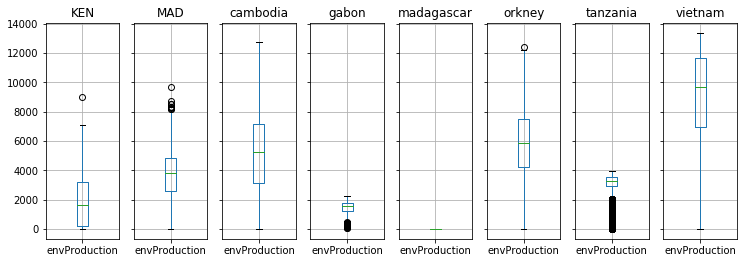

In [19]:
# plot boxplots
data[['envProduction', 'country']].groupby('country').boxplot(figsize=(12,4), layout=(1,8))
plt.show()

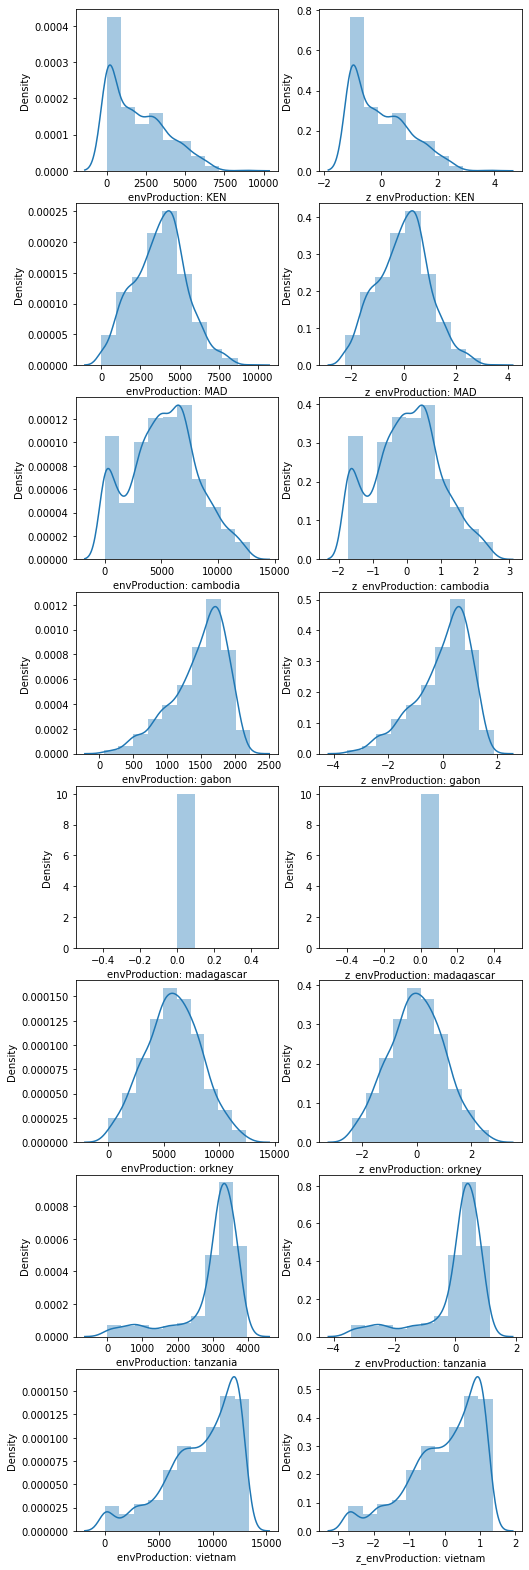

In [20]:
# plot histogram
fig, ax = plt.subplots(8, 2, figsize=(8,28))
i=0
for country, group in data.groupby('country'):
    sns.distplot(group['envProduction'], bins=10, ax= ax[i][0], axlabel="envProduction: {}".format(country))
    sns.distplot(group['z_envProduction'], bins=10, ax=ax[i][1], axlabel="z_envProduction: {}".format(country))
    i+=1

## Distributions in combined dataset

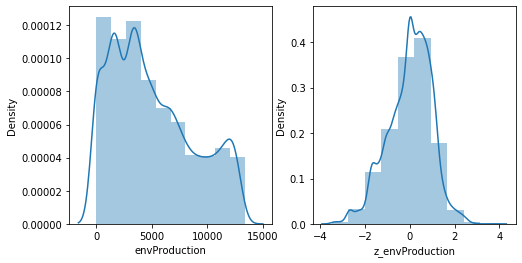

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(data['envProduction'], bins=10, ax= ax[0])
sns.distplot(data['z_envProduction'], bins=10, ax=ax[1])
print()

## QQ-plot for comparing the country-wise distributions

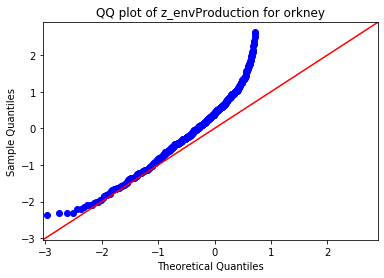

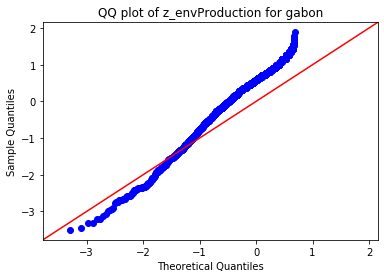

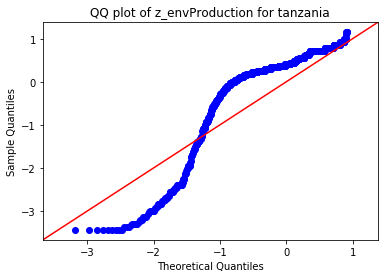

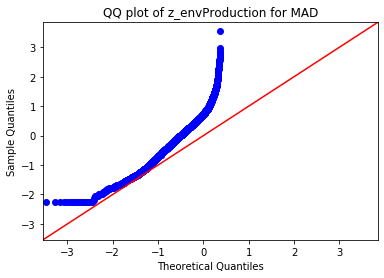

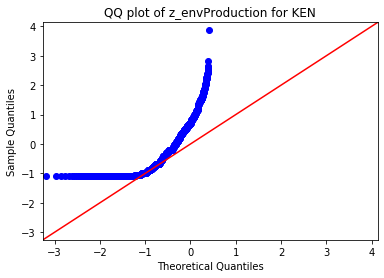

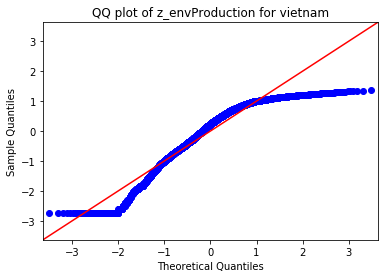

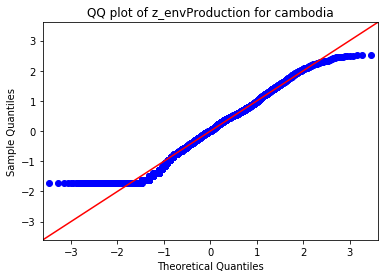

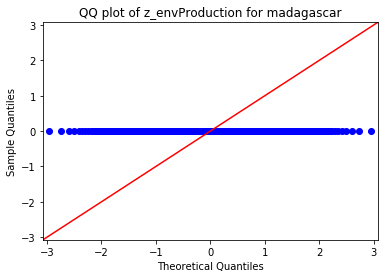

In [22]:
for val in data.country.unique():
    sm.qqplot(data[data['country']==val]['z_envProduction'], line ='45', label=val)
    plt.title('QQ plot of z_envProduction for {}'.format(val))
    plt.show()

## Visualize distributions on the same plot

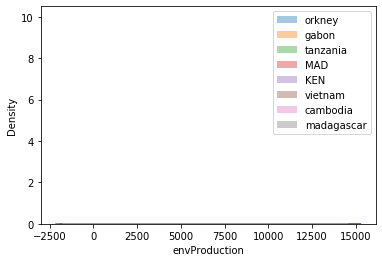

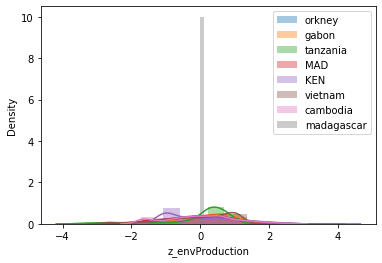

In [23]:
for val in data.country.unique():
    sns.distplot(data[data['country']==val]['envProduction'], bins=10, label=val)
    plt.legend()
plt.show()

for val in data.country.unique():
    sns.distplot(data[data['country']==val]['z_envProduction'], bins=10, label=val)
    plt.legend()
plt.show()

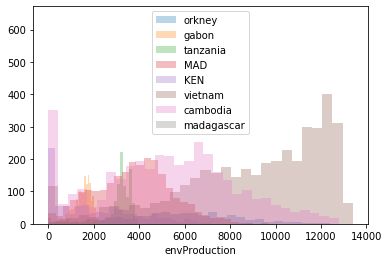

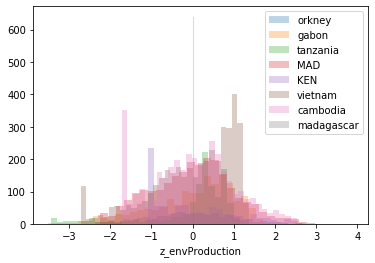

In [24]:
for val in data.country.unique():
    plt.hist(data[data['country']==val]['envProduction'], label=val, alpha=0.3, bins=30)
    plt.xlabel('envProduction')
    plt.legend()
plt.show()

for val in data.country.unique():
    plt.hist(data[data['country']==val]['z_envProduction'], label=val, alpha=0.3, bins=30)
    plt.xlabel('z_envProduction')
    plt.legend()
plt.show()